In [101]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display
import IPython.display as ipd
from sklearn.preprocessing import scale

### Classes

In [5]:
df = pd.read_csv('clean_track_info.csv',index_col=0)
df.head()

track_fma_id           track_spot_id  time_signature  time_sig_confidence  \
0             5  66381EvBZ6e3RXzYATpGmN               4                1.000   
1            18  2ee4Do6eRNXGg7XqKGkvz3               3                1.000   
2            86  1OrbImTwzIVWtW1msIfa2r               4                0.815   
3           316  4ypiBQX6nsXTwLkaHwnaRI               4                0.349   
4           322  4m8jcQJ7wg4RyFNnIvZZgn               3                0.143   

   tracks_id        track_name                      artist_name  \
0         10           Freeway                        Kurt Vile   
1        141              Ohio  Alec K. Redfearn & the Eyesores   
2        213             Boute                               Au   
3        534     I Can See You                   Charles Manson   
4        540  The Black Pirate                   Charles Manson   

              album_name  track_bit track_top_genre  
0      Constant Hitmaker     192000             Pop  
1  Every Man For Himself     128000            Folk  
2                     Au     256000             Pop  
3               One Mind     128000            Folk  
4               One Mind     128000            Folk

### Collecting actual audio files for scraped data

In [ ]:
# df['tracks_id'] is the track ID for the audio clips in the fma small dataset

In [99]:
# getting filepaths for the tracks in the df
mp3_file_paths = []
for root, dirs, files in os.walk(r'C:\Users\Mendel Oster\data_science\fma_small\fma_small'):
    for file in files:
        if file.endswith(".mp3"):
            if int(file[:-4]) in list(df['tracks_id'].unique()):
                mp3_file_paths.append(os.path.join(root,file))

In [148]:
# copying the 1222 samples into new directory
for mp3 in mp3_file_paths:
    copy2(mp3, r'C:\Users\Mendel Oster\data_science\fma_small\all_tracks')

In [31]:
# for root, dirs, files in os.walk(r'C:\Users\Mendel Oster\data_science\fma_small\wav'):
#     for file in files:
#         dst = os.path.join(root,file[:-8]+'.wav')
#         src = os.path.join(root,file)
#         os.rename(src, dst)

In [32]:
wav_paths = []
for root, dirs, files in os.walk(r'C:\Users\Mendel Oster\data_science\fma_small\wav'):
    for file in files:
        wav_paths.append(os.path.join(root,file))

### Feature Engineering

1. Audio time series

In [70]:
ipd.Audio(wav_paths[0],rate=44100)

In [34]:
test_y, test_sr = librosa.load(wav_paths[0],sr=None)

In [44]:
print(test_y.shape)
print(test_sr)

(1321967,)
44100


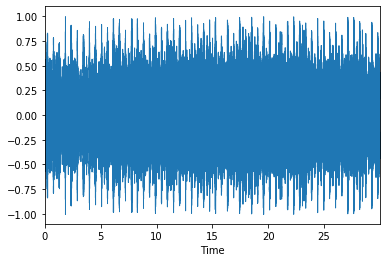

In [97]:
librosa.display.waveplot(test_y, test_sr)

In [41]:
test_onset = librosa.onset.onset_strength(test_y, test_sr)

In [43]:
test_onset.shape
# visualize?

(2582,)

In [72]:
test_onsets = librosa.onset.onset_detect(test_y,test_sr,onset_envelope=test_onset)

In [73]:
test_tempo, test_beats = librosa.beat.beat_track(y=test_y,sr=test_sr,onset_envelope=test_onset)
print(test_tempo)
print(test_beats.shape)

112.34714673913044
(55,)


In [74]:
test_y.shape[0] / test_beats.shape[0]

24035.763636363637

In [77]:
# convert beat frames into time
test_beat_times = librosa.frames_to_time(test_beats,sr=test_sr)

In [78]:
test_beat_times

array([ 0.18575964,  0.73142857,  1.26548753,  1.78793651,  2.33360544,
        2.87927438,  3.42494331,  3.95900227,  4.49306122,  5.03873016,
        5.57278912,  6.0952381 ,  6.64090703,  7.17496599,  7.72063492,
        8.25469388,  8.78875283,  9.33442177,  9.86848073, 10.40253968,
       10.93659864, 11.48226757, 12.02793651, 12.55038549, 13.09605442,
       13.63011338, 14.16417234, 14.69823129, 15.23229025, 15.77795918,
       16.32362812, 16.85768707, 17.39174603, 17.93741497, 18.47147392,
       19.00553288, 19.53959184, 20.07365079, 20.61931973, 21.15337868,
       21.69904762, 22.23310658, 22.76716553, 23.30122449, 23.84689342,
       24.38095238, 24.92662132, 25.46068027, 25.99473923, 26.54040816,
       27.07446712, 27.60852608, 28.13097506, 28.67664399, 29.22231293])

### Time, repetition, and structure

In [82]:
test_mfcc = librosa.feature.mfcc(y=test_y, sr=test_sr)
print(test_mfcc.shape)

(20, 2582)


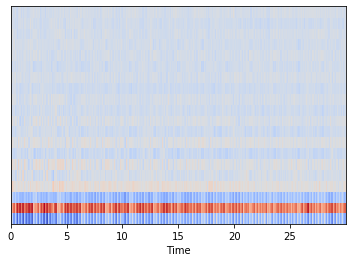

In [100]:
librosa.display.specshow(test_mfcc, sr= test_sr, x_axis='time')

In [102]:
scaled_mfcc = scale(test_mfcc, axis=1)

C:\Users\Mendel Oster\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\Mendel Oster\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [103]:
print(scaled_mfcc.mean())
print(scaled_mfcc.var())

-5.9096783e-10
1.0000001


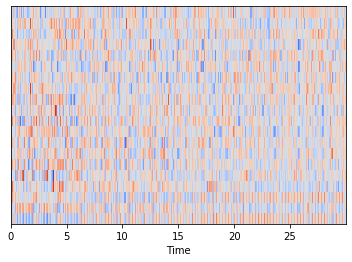

In [104]:
librosa.display.specshow(scaled_mfcc, sr=test_sr, x_axis='time')

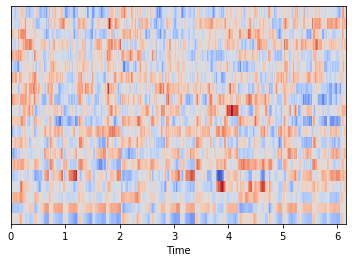

In [111]:
librosa.display.specshow(scaled_mfcc[:,:530], sr=test_sr, x_axis='time')

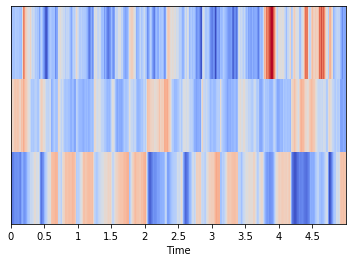

In [120]:
librosa.display.specshow(scaled_mfcc[1:4,:430], sr=test_sr, x_axis='time')

In [83]:
test_R = librosa.segment.recurrence_matrix(test_mfcc)
print(test_R.shape)

(2582, 2582)


In [92]:
test_R[1].sum()

14

In [86]:
test_k_R = librosa.segment.recurrence_matrix(test_mfcc,k=5)

In [95]:
test_k_R

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

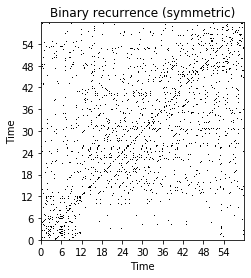

In [85]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
librosa.display.specshow(test_R, x_axis='time', y_axis='time')
plt.title('Binary recurrence (symmetric)')
# plt.subplot(1, 2, 2)
# librosa.display.specshow(R_aff, x_axis='time', y_axis='time'
#                          , cmap='magma_r')
# plt.title('Affinity recurrence')
# plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Binary recurrence (symmetric)')

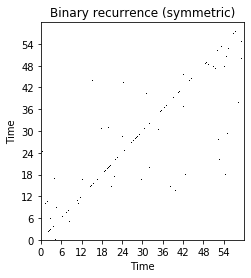

In [96]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
librosa.display.specshow(test_k_R, x_axis='time', y_axis='time')
plt.title('Binary recurrence (symmetric)')